## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [65]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [66]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [67]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [68]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [69]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [70]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [71]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [72]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [73]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [74]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [75]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [76]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [77]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [78]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [79]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

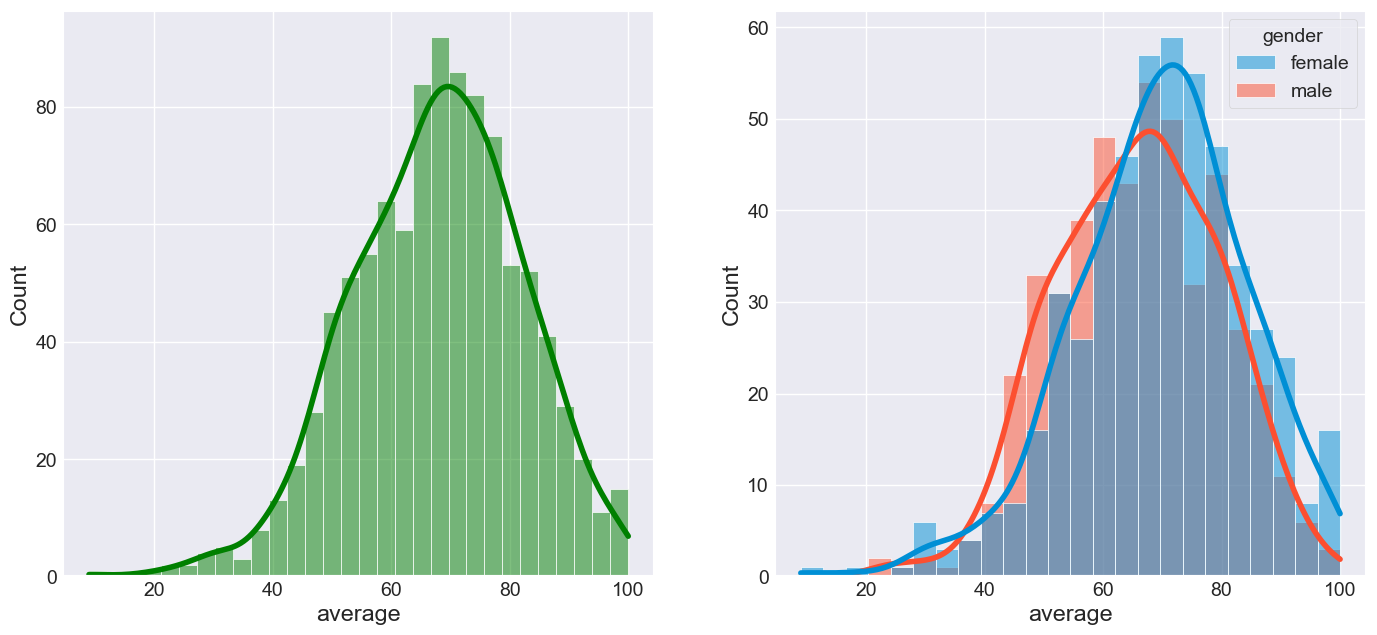

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

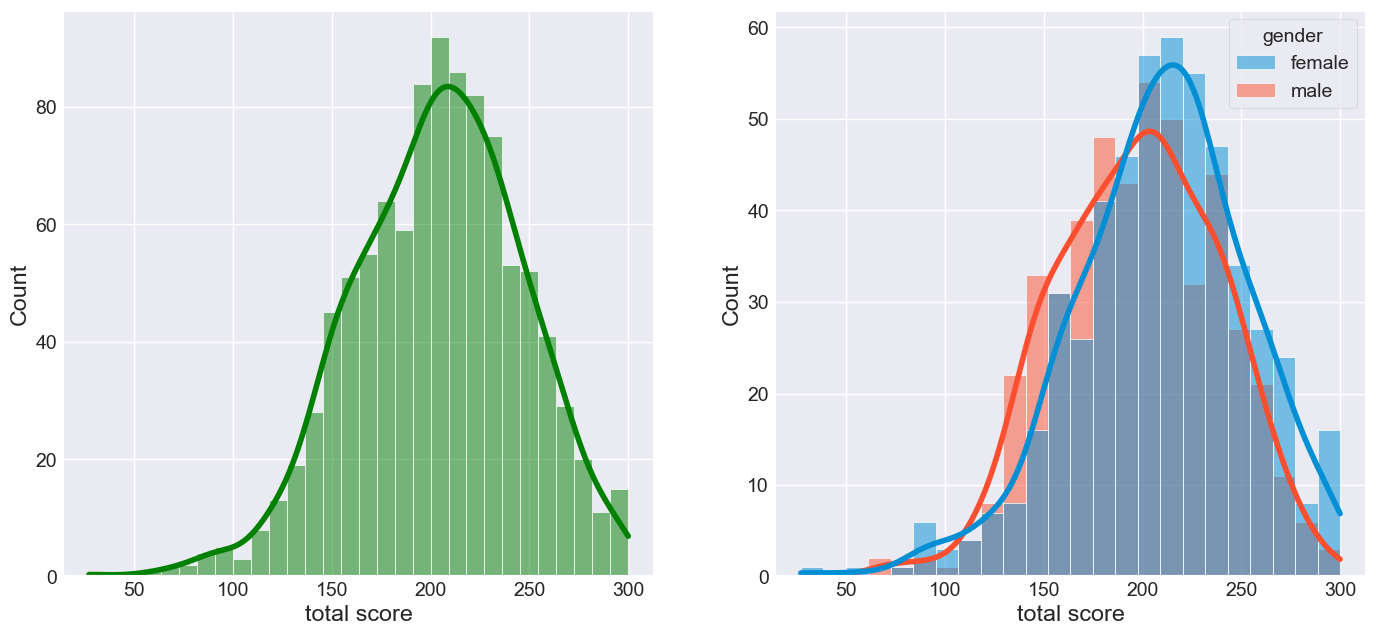

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

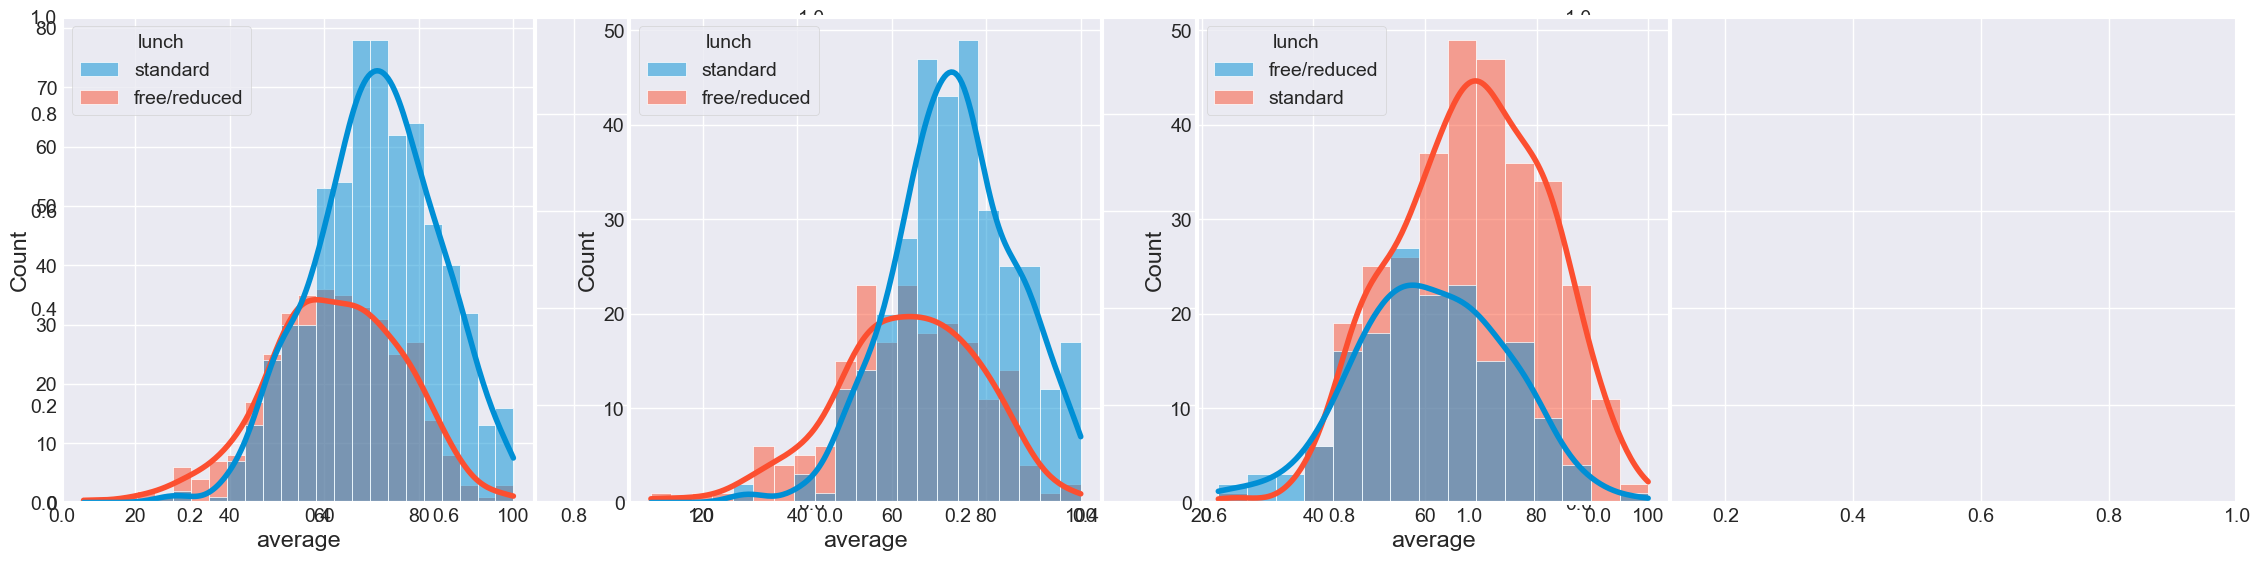

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

Index(['average', 'gender', 'parental level of education'], dtype='object')


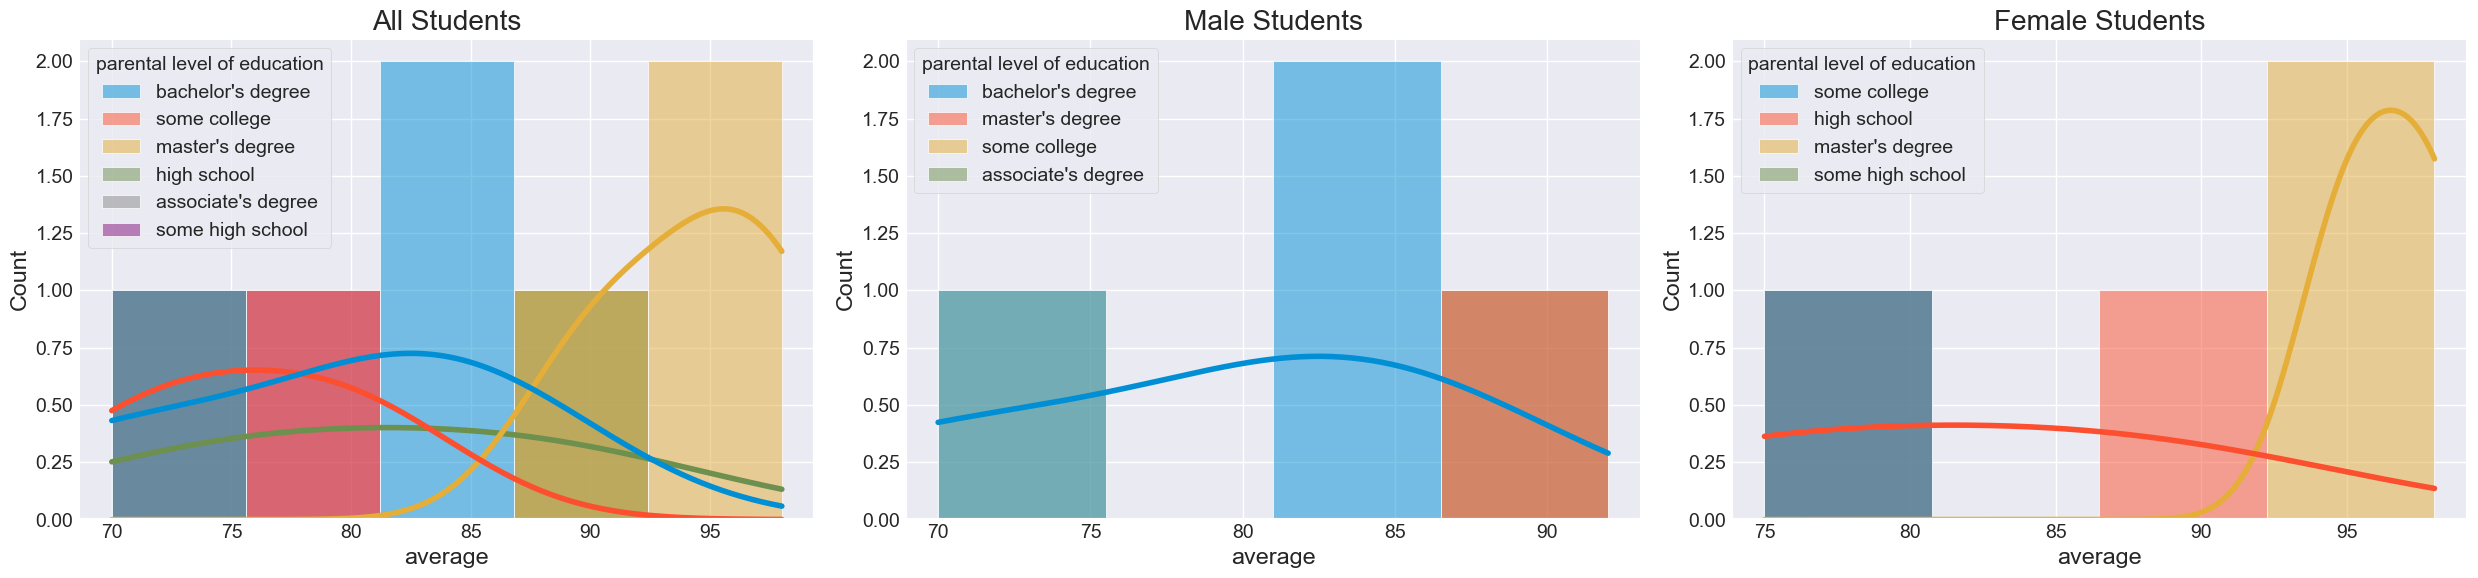

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'average': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78, 82, 98],
        'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
        'parental level of education': ['bachelor\'s degree', 'some college', 'master\'s degree', 'high school', 'bachelor\'s degree', 'master\'s degree', 'some college', 'high school', 'associate\'s degree', 'some high school', 'bachelor\'s degree', 'master\'s degree']}
df = pd.DataFrame(data)

# 1. Print column names to check for typos:
print(df.columns)

# 2. Determine the correct column name (case-sensitive!):
correct_column_name = 'parental level of education'  # Replace if different

# 3. Handle missing data (NaNs) if any:
# df.dropna(subset=[correct_column_name], inplace=True)  # Remove rows with NaNs (uncomment if needed)
# df[correct_column_name].fillna('Unknown', inplace=True)  # Fill NaNs (uncomment if needed)

# Plotting:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue=correct_column_name) # Use correct name
plt.title("All Students")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue=correct_column_name)  # Use correct name
plt.title("Male Students")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue=correct_column_name)  # Use correct name
plt.title("Female Students")

plt.tight_layout()
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

Index(['average', 'gender', 'race/ethnicity'], dtype='object')


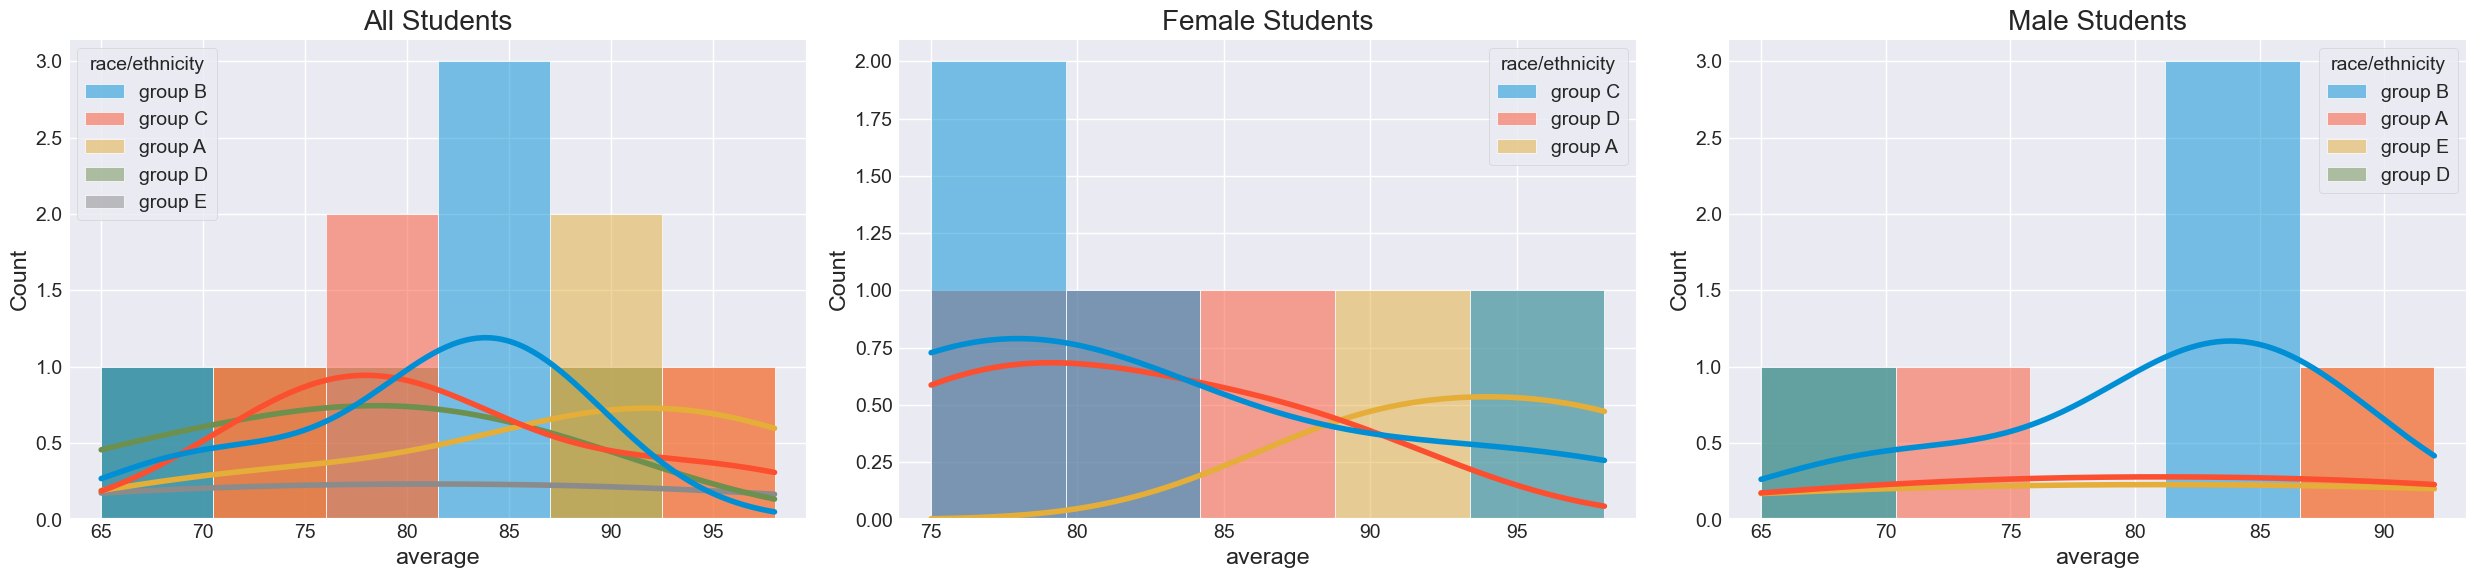


--- Statistics ---

group B:
  Average Score: 80.50
  Number of Students: 4
  male Average Score: 80.50
  Number of male Students: 4
  female Average Score: nan
  Number of female Students: 0

group C:
  Average Score: 82.00
  Number of Students: 4
  male Average Score: nan
  Number of male Students: 0
  female Average Score: 82.00
  Number of female Students: 4

group A:
  Average Score: 87.50
  Number of Students: 4
  male Average Score: 81.00
  Number of male Students: 2
  female Average Score: 94.00
  Number of female Students: 2

group D:
  Average Score: 77.00
  Number of Students: 4
  male Average Score: 65.00
  Number of male Students: 1
  female Average Score: 81.00
  Number of female Students: 3

group E:
  Average Score: 81.00
  Number of Students: 2
  male Average Score: 81.00
  Number of male Students: 2
  female Average Score: nan
  Number of female Students: 0


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'average': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78, 82, 98, 65, 75, 85, 90, 70, 80],
        'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group B', 'group C', 'group A', 'group D', 'group E', 'group C', 'group B', 'group A', 'group D', 'group C', 'group B', 'group A', 'group E', 'group D']}
df = pd.DataFrame(data)


# 1. Print column names to check for typos:
print(df.columns)

# 2. Determine the correct column name (case-sensitive!):
correct_race_column = 'race/ethnicity'  # Replace if different

# 3. Handle missing data (NaNs) if any:
# df.dropna(subset=[correct_race_column], inplace=True)  # Remove rows with NaNs (uncomment if needed)
# df[correct_race_column].fillna('Unknown', inplace=True)  # Fill NaNs (uncomment if needed)

# Plotting:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)  # Corrected subplot number
sns.histplot(data=df, x='average', kde=True, hue=correct_race_column)  # Use correct name
plt.title("All Students")

plt.subplot(132)  # Corrected subplot number
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue=correct_race_column)  # Use correct name
plt.title("Female Students")

plt.subplot(133)  # Corrected subplot number
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue=correct_race_column)  # Use correct name
plt.title("Male Students")

plt.tight_layout()
plt.show()


# --- Statistics ---
print("\n--- Statistics ---")

for race in df[correct_race_column].unique():
    subset = df[df[correct_race_column] == race]
    print(f"\n{race}:")
    print(f"  Average Score: {subset['average'].mean():.2f}")
    print(f"  Number of Students: {len(subset)}")
    # Add other statistics as needed (median, standard deviation, etc.)
    for gender in df['gender'].unique():
        gender_subset = subset[subset['gender'] == gender]
        print(f"  {gender} Average Score: {gender_subset['average'].mean():.2f}")
        print(f"  Number of {gender} Students: {len(gender_subset)}")

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

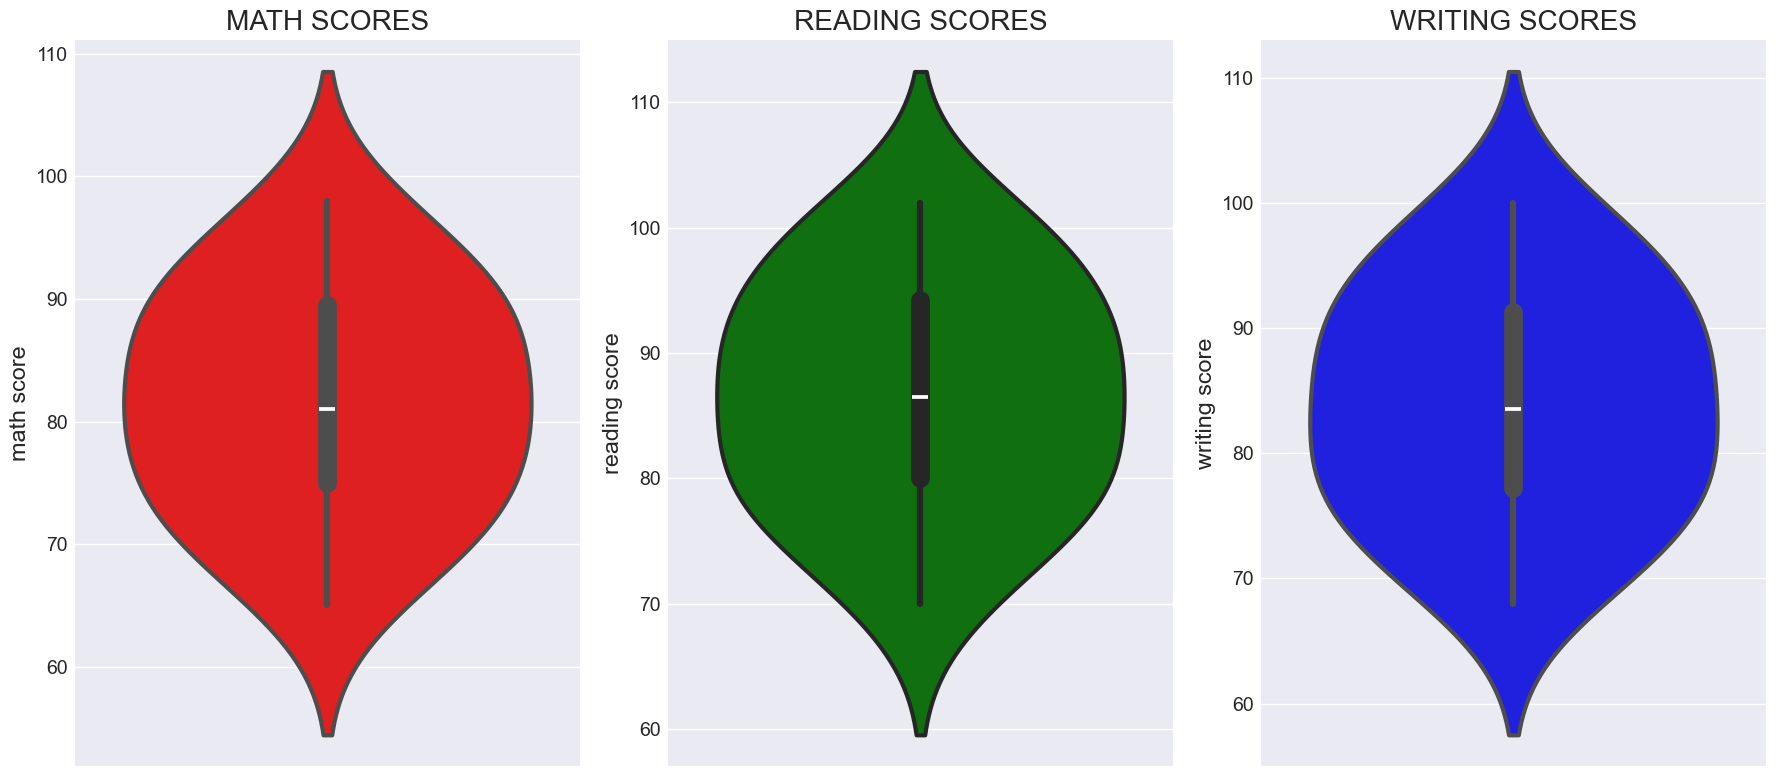

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'math score': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78, 82, 98, 65, 75, 85, 90, 70, 80],
        'reading score': [75, 85, 95, 80, 90, 100, 78, 92, 98, 82, 88, 102, 70, 80, 90, 95, 75, 85],
        'writing score': [72, 82, 92, 77, 87, 97, 75, 89, 95, 79, 85, 100, 68, 78, 88, 93, 72, 82]}
df = pd.DataFrame(data)

plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)  # Corrected subplot number (1,3,1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)  # Corrected subplot number (1,3,2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)  # Corrected subplot number (1,3,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

plt.tight_layout() # Prevents overlapping titles/labels
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

Index(['average', 'gender', 'race/ethnicity'], dtype='object')


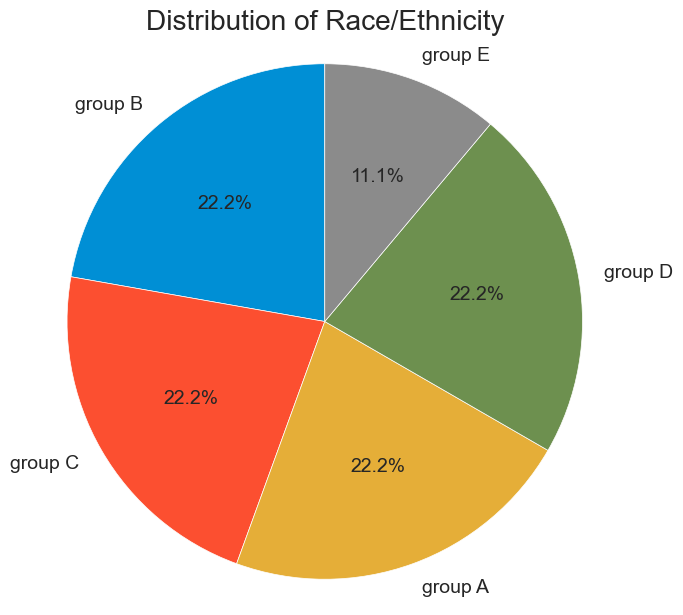

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'average': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78, 82, 98, 65, 75, 85, 90, 70, 80],
        'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group B', 'group C', 'group A', 'group D', 'group E', 'group C', 'group B', 'group A', 'group D', 'group C', 'group B', 'group A', 'group E', 'group D']}
df = pd.DataFrame(data)


print(df.columns)  # VERY IMPORTANT: Print column names to check for typos!

correct_race_column = 'race/ethnicity' # Replace with the actual name from df.columns

size = df[correct_race_column].value_counts()
labels = size.index # Correct way to get labels

plt.figure(figsize=(7,7))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Race/Ethnicity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

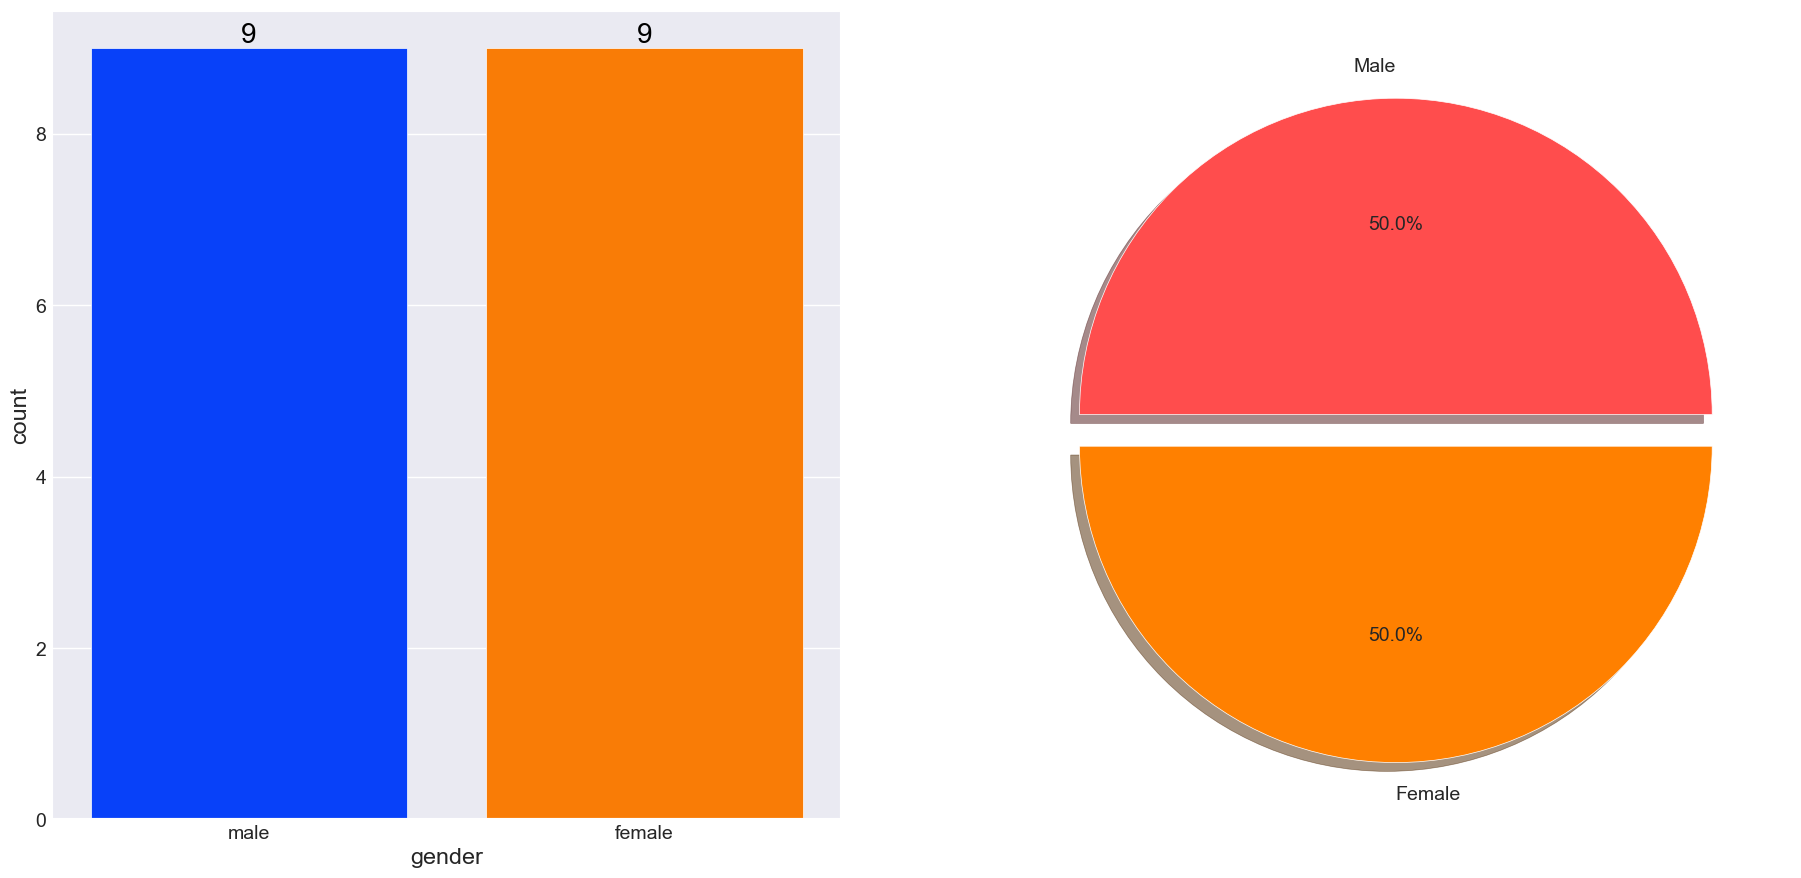

In [87]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [88]:
import pandas as pd

# Sample DataFrame (replace with your actual data)
data = {'gender': ['male', 'female', 'male', 'female', 'male', 'female'],
        'age': ['25', '30', '22', '28', '35', '27'],  # Age is stored as strings
        'score': [80, 90, 75, 85, 95, 88]}
df = pd.DataFrame(data)

print(df.dtypes)  # Check data types

# Convert 'age' to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

print(df.dtypes) # Check if the column type is now numeric

gender_group = df.groupby('gender').mean()
print(gender_group)

# --- Or, if you don't want to convert 'age' ---
gender_group_numeric = df.select_dtypes(include=['number']).groupby('gender').mean()
print(gender_group_numeric)

# Or, specifying the columns
gender_group_specified = df.groupby('gender')[['score']].mean()
print(gender_group_specified)

gender    object
age       object
score      int64
dtype: object
gender    object
age        int64
score      int64
dtype: object
              age      score
gender                      
female  28.333333  87.666667
male    27.333333  83.333333


KeyError: 'gender'

In [89]:
import pandas as pd

# Sample DataFrame (replace with your actual data)
data = {'gender': ['male', 'female', 'male', 'female'],
        'age': ['25', '30', '22', '28'],  # Age is stored as strings!
        'score': [80, 90, 75, 85]}
df = pd.DataFrame(data)

print(df.dtypes)  # Check data types (IMPORTANT!)

# Convert 'age' to numeric (if it should be numeric):
df['age'] = pd.to_numeric(df['age'], errors='coerce')

print(df.dtypes) # Check if the column type is now numeric

# Handle NaN values if any (after conversion):
df.dropna(inplace=True)  # Or df['age'].fillna(0, inplace=True) or some other appropriate value

gender_group = df.groupby('gender').mean()
print(gender_group)

# --- If you DON'T want to convert 'age' (it's categorical) ---
# Select only numeric columns:
numeric_df = df.select_dtypes(include=['number'])
gender_group_numeric = numeric_df.groupby('gender').mean()
print(gender_group_numeric)

# Or, specify the columns:
gender_group_specified = df.groupby('gender')[['score']].mean()
print(gender_group_specified)

gender    object
age       object
score      int64
dtype: object
gender    object
age        int64
score      int64
dtype: object
         age  score
gender             
female  29.0   87.5
male    23.5   77.5


KeyError: 'gender'

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

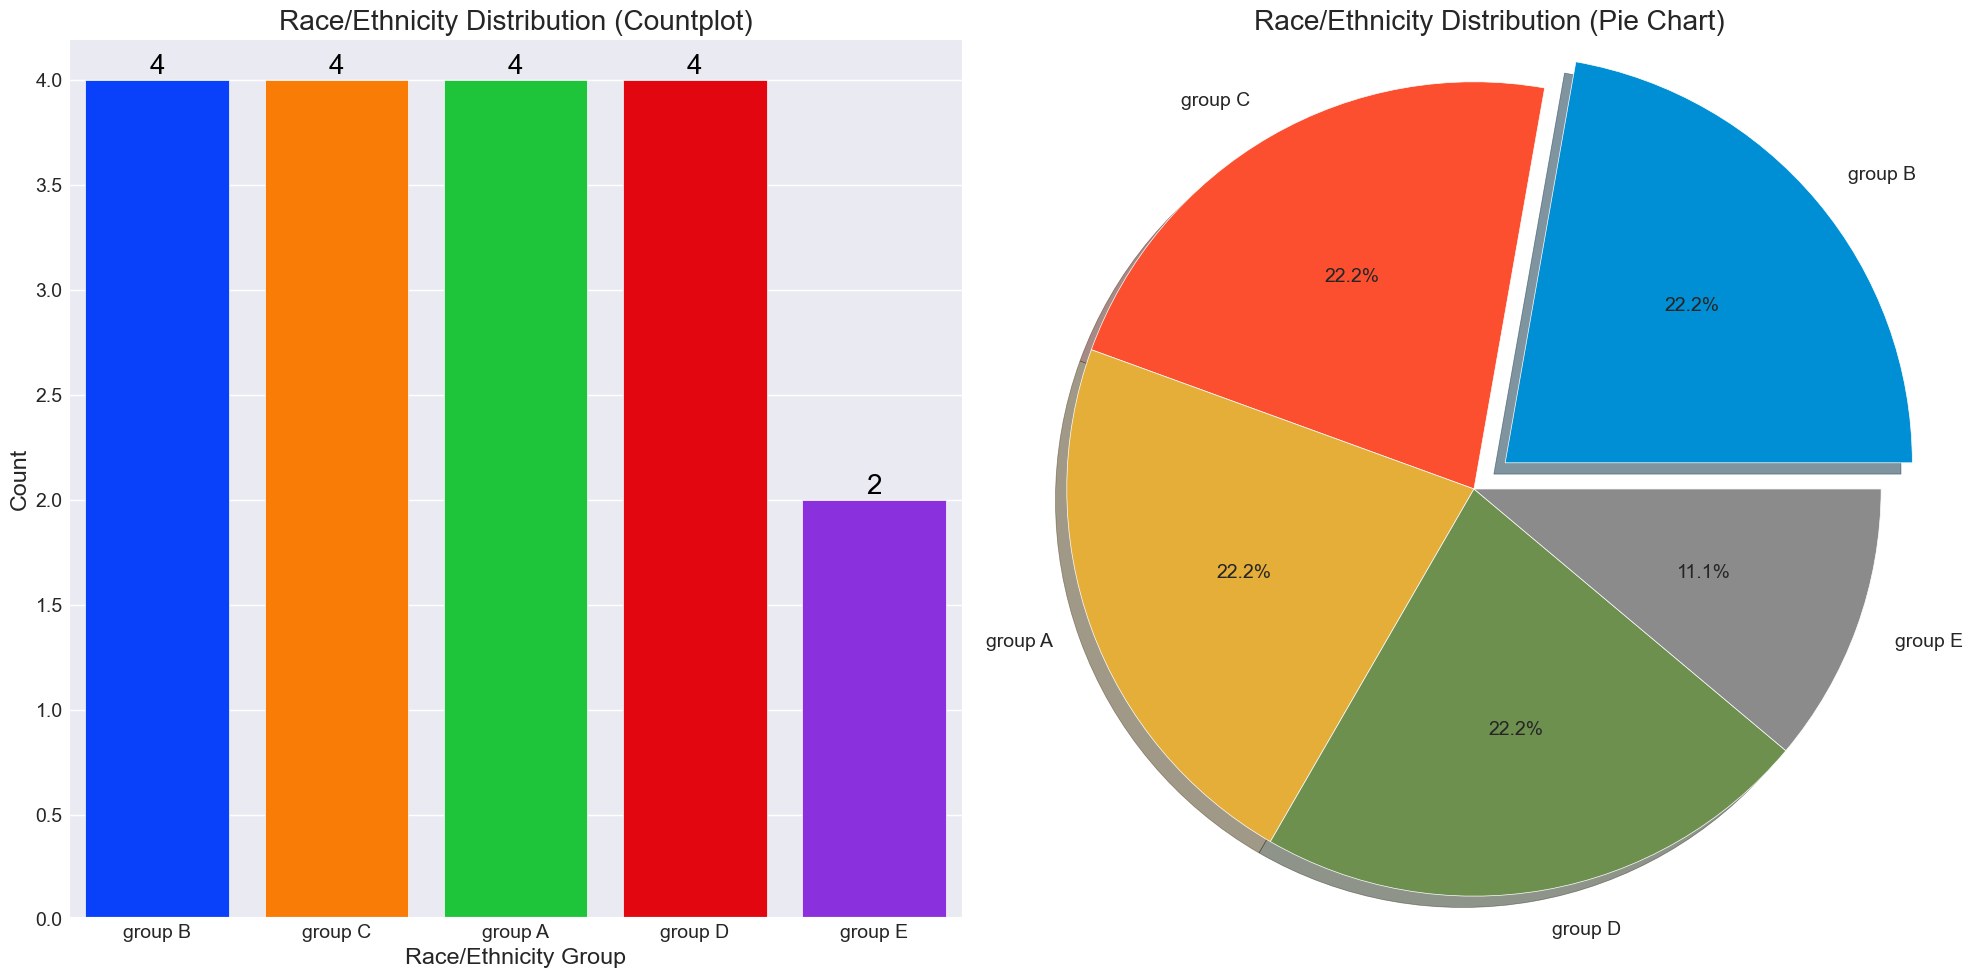

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'average': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78, 82, 98, 65, 75, 85, 90, 70, 80],
        'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group B', 'group C', 'group A', 'group D', 'group E', 'group C', 'group B', 'group A', 'group D', 'group C', 'group B', 'group A', 'group E', 'group D']}
df = pd.DataFrame(data)

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Race/Ethnicity Distribution (Countplot)')
ax[0].set_xlabel('Race/Ethnicity Group')
ax[0].set_ylabel('Count')

ax[1].pie(x=df['race/ethnicity'].value_counts(), 
        labels=df['race/ethnicity'].value_counts().index, 
        explode=[0.1, 0, 0, 0, 0], 
        autopct='%1.1f%%', 
        shadow=True,
        textprops={'fontsize': 14})
ax[1].set_title('Race/Ethnicity Distribution (Pie Chart)')
ax[1].axis('equal')

plt.tight_layout()
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Index(['average', 'gender', 'race/ethnicity', 'math score', 'reading score',
       'writing score'],
      dtype='object')


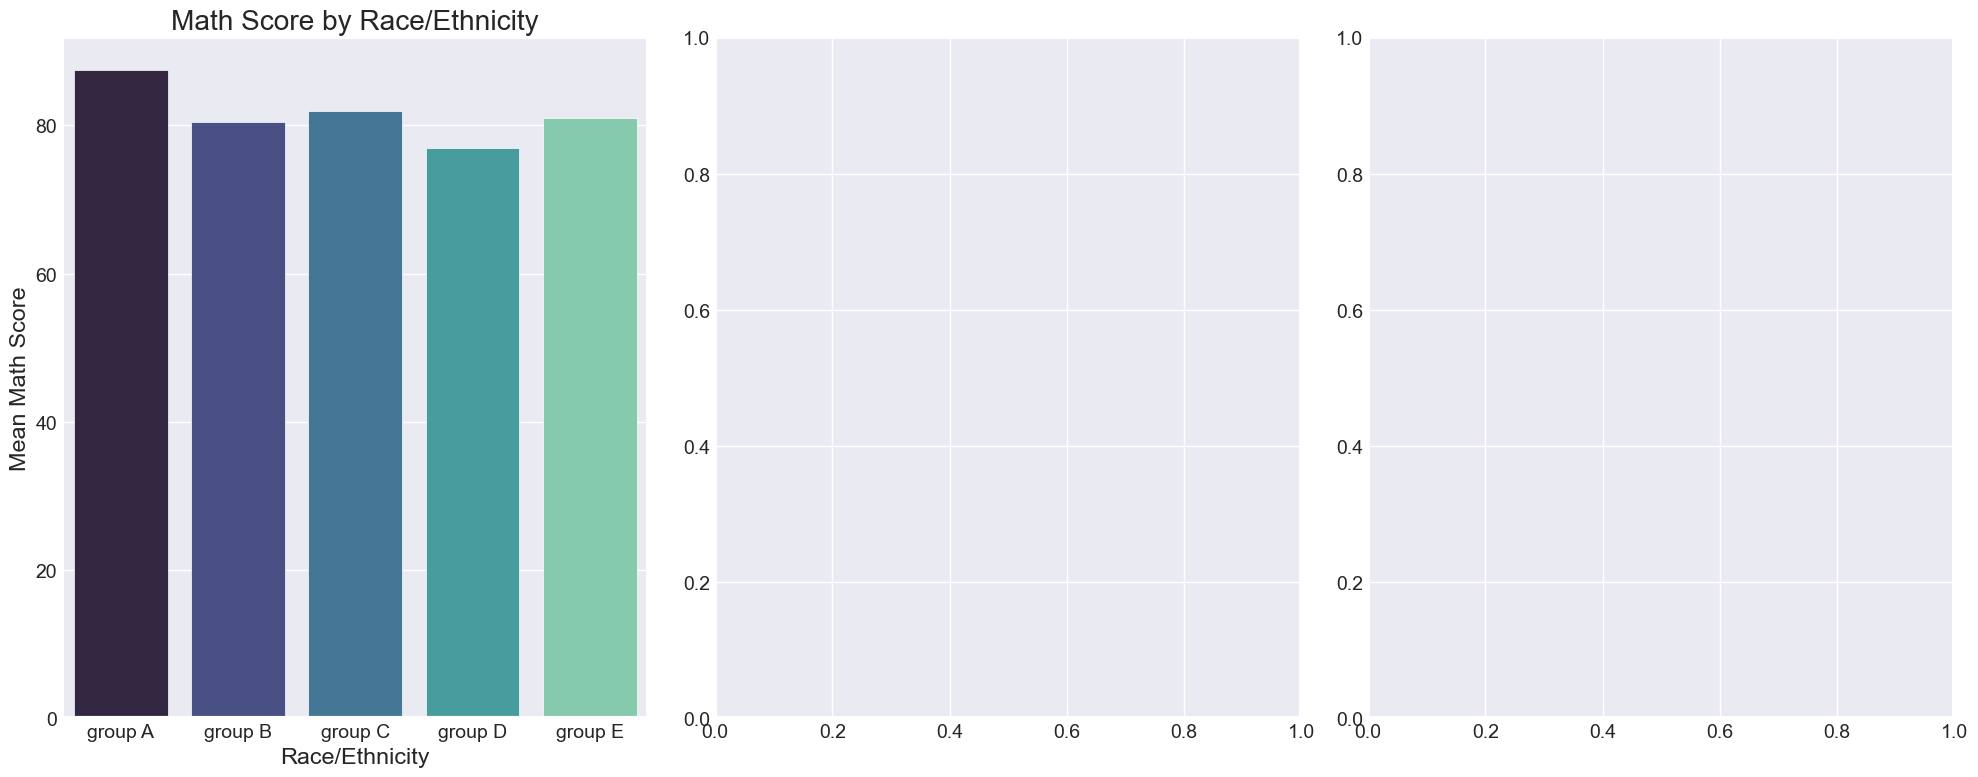

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'average': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78, 82, 98, 65, 75, 85, 90, 70, 80],
        'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group B', 'group C', 'group A', 'group D', 'group E', 'group C', 'group B', 'group A', 'group D', 'group C', 'group B', 'group A', 'group E', 'group D'],
       'math score': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78, 82, 98, 65, 75, 85, 90, 70, 80],
        'reading score': [75, 85, 95, 80, 90, 100, 78, 92, 98, 82, 88, 102, 70, 80, 90, 95, 75, 85],
        'writing score': [72, 82, 92, 77, 87, 97, 75, 89, 95, 79, 85, 100, 68, 78, 88, 93, 72, 82]}
df = pd.DataFrame(data)

print(df.columns)  # VERY IMPORTANT: Check column names!

correct_race_column = 'race/ethnicity' # Replace with the correct name from df.columns

Group_data2 = df.groupby(correct_race_column)

f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score by Race/Ethnicity')
ax[0].set_xlabel('Race/Ethnicity')
ax[0].set_ylabel('Mean Math Score')

# ... (similar code for reading and writing scores on ax[1] and ax[2])

plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

Index(['gender', 'race/ethnicity', 'parental level of education'], dtype='object')


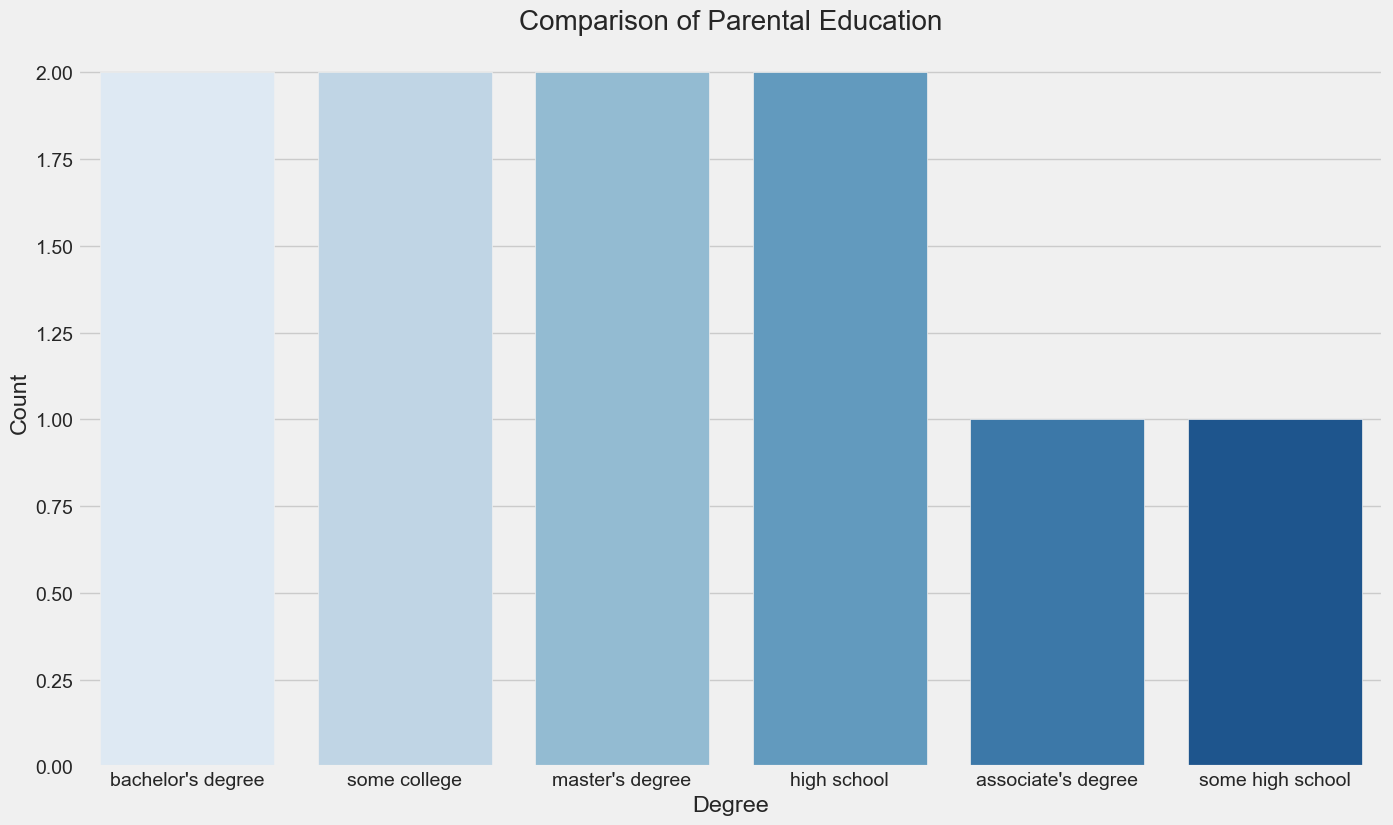

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'gender': ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male'],
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group B', 'group C', 'group A', 'group D', 'group E', 'group C'],
        'parental level of education': ["bachelor's degree", 'some college', "master's degree", 'high school', "associate's degree", 'some college', "high school", "some high school", "bachelor's degree", "master's degree"]}
df = pd.DataFrame(data)

# 1. Check Column Name:
print(df.columns)

# 2. Correct Column Name (if needed):
correct_parental_education_column = 'parental level of education'  # Replace if different

# 3. Plotting:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x=df[correct_parental_education_column], palette='Blues')  # Use correct name
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

Index(['gender', 'race/ethnicity', 'parental level of education', 'math score',
       'reading score', 'writing score'],
      dtype='object')
Grouped Data (Numeric Means):
                              math score  reading score  writing score
parental level of education                                          
associate's degree                 85.0           90.0           87.0
bachelor's degree                  81.0           86.5           83.5
high school                        73.5           79.0           76.0
master's degree                    84.0           88.5           85.5
some college                       87.5           92.5           89.5
some high school                   88.0           92.0           89.0

Merged Data (Original data with Means):
    gender race/ethnicity parental level of education  math score  \
0  female        group B           bachelor's degree          70   
1    male        group C                some college          80   
2  female        gr

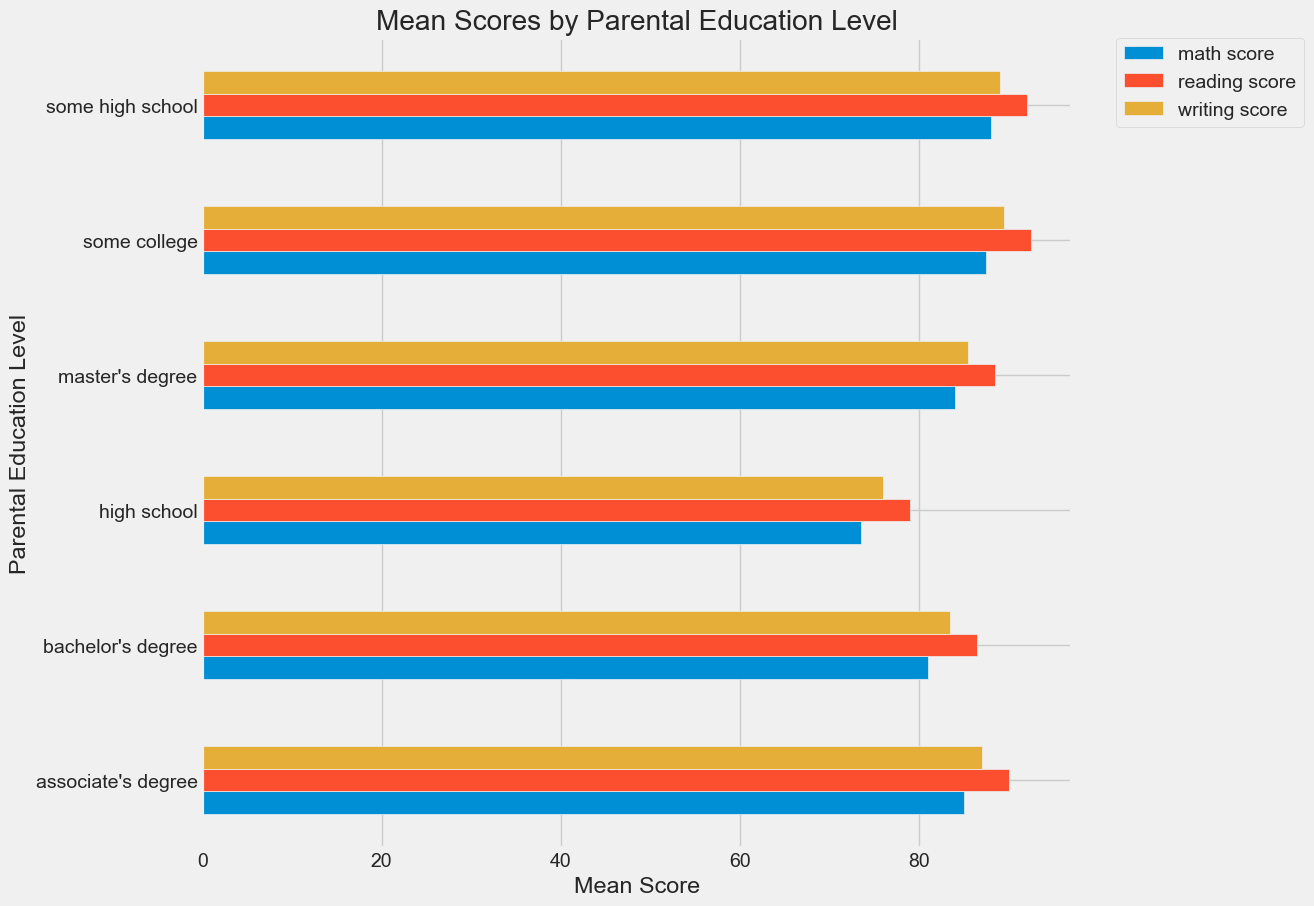

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'gender': ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male'],
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group B', 'group C', 'group A', 'group D', 'group E', 'group C'],
        'parental level of education': ["bachelor's degree", 'some college', "master's degree", 'high school', "associate's degree", 'some college', "high school", "some high school", "bachelor's degree", "master's degree"],
       'math score': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78],
        'reading score': [75, 85, 95, 80, 90, 100, 78, 92, 98, 82],
        'writing score': [72, 82, 92, 77, 87, 97, 75, 89, 95, 79]}
df = pd.DataFrame(data)

# 1. Check Column Names (Crucial):
print(df.columns)

# 2. Correct Column Name (if needed):
correct_parental_education_column = 'parental level of education'  # Replace if different

# 3. Group and Calculate Mean (Corrected):
grouped_data = df.groupby(correct_parental_education_column)
grouped_data_numeric = grouped_data.mean(numeric_only=True)  # Calculate mean only for numeric columns

print("Grouped Data (Numeric Means):\n", grouped_data_numeric)

# 4. Merge (Optional, but often useful):
merged_data = df.merge(grouped_data_numeric, on=correct_parental_education_column, how='left', suffixes=('', '_mean'))
print("\nMerged Data (Original data with Means):\n", merged_data)


# 5. Plotting (using grouped_data_numeric):
grouped_data_numeric.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Mean Scores by Parental Education Level")
plt.xlabel("Mean Score")
plt.ylabel("Parental Education Level")
plt.show()

# --- Alternative Plotting (using merged_data - if you want to include all columns)---
# merged_data.groupby(correct_parental_education_column).mean(numeric_only=True).plot(kind='barh', figsize=(10,10))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title("Mean Scores by Parental Education Level")
# plt.xlabel("Mean Score")
# plt.ylabel("Parental Education Level")
# plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'math score', 'reading score', 'writing score'],
      dtype='object')


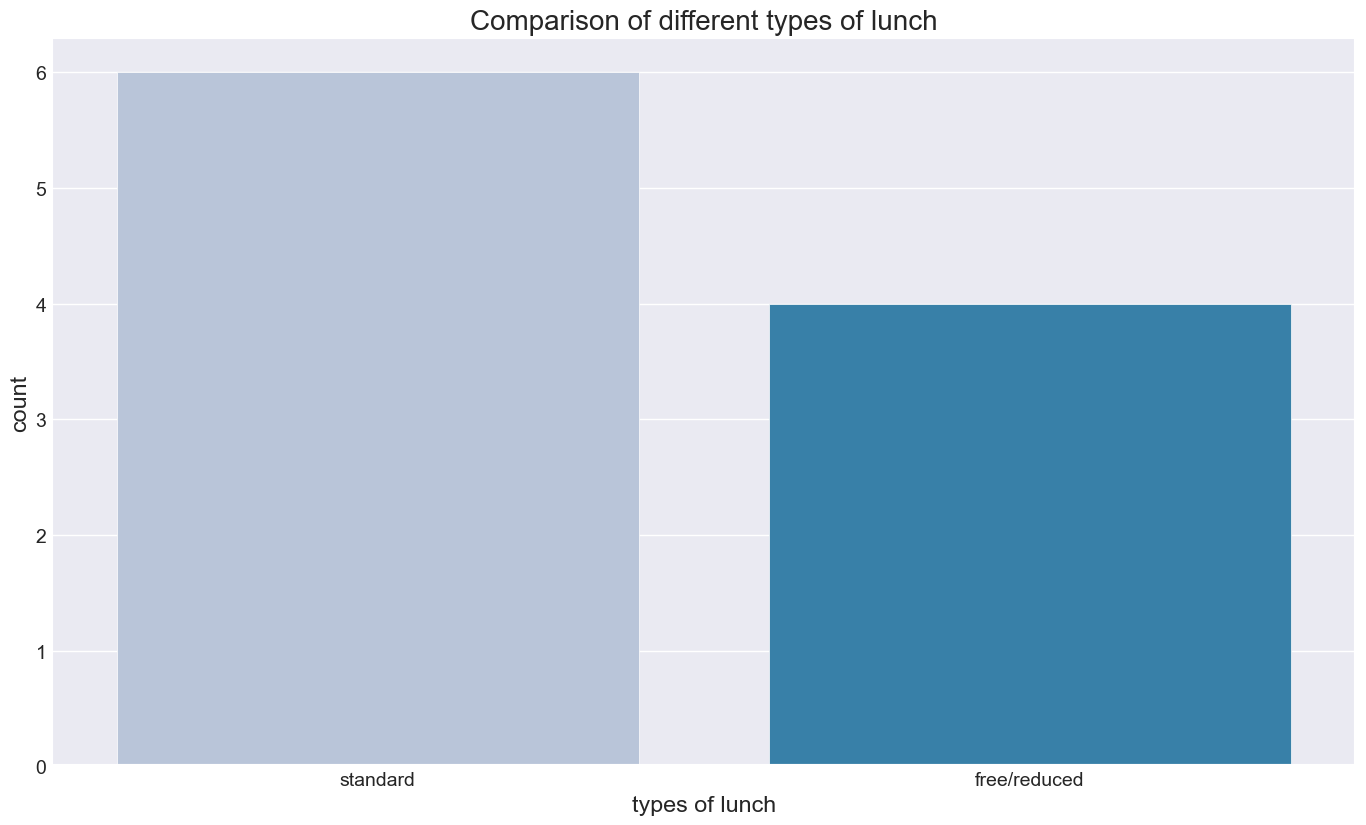

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (REPLACE THIS WITH YOUR ACTUAL DATA)
data = {'gender': ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male'],
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group B', 'group C', 'group A', 'group D', 'group E', 'group C'],
        'parental level of education': ["bachelor's degree", 'some college', "master's degree", 'high school', "associate's degree", 'some college', "high school", "some high school", "bachelor's degree", "master's degree"],
       'lunch': ['standard', 'free/reduced', 'standard', 'free/reduced', 'standard', 'standard', 'free/reduced', 'standard', 'free/reduced', 'standard'],
       'math score': [70, 80, 90, 75, 85, 95, 72, 88, 92, 78],
        'reading score': [75, 85, 95, 80, 90, 100, 78, 92, 98, 82],
        'writing score': [72, 82, 92, 77, 87, 97, 75, 89, 95, 79]}
df = pd.DataFrame(data)

# 1. Check Column Name:
print(df.columns)

# 2. Correct Column Name (if needed):
correct_lunch_column = 'lunch'  # Replace if different

# 3. Set Seaborn Style:
sns.set_style('darkgrid')  # Or 'whitegrid', 'ticks', etc.

# 4. Plotting:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(x=df[correct_lunch_column], palette='PuBu')  # Use correct name
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

ValueError: Could not interpret value `test preparation course` for `hue`. An entry with this name does not appear in `data`.

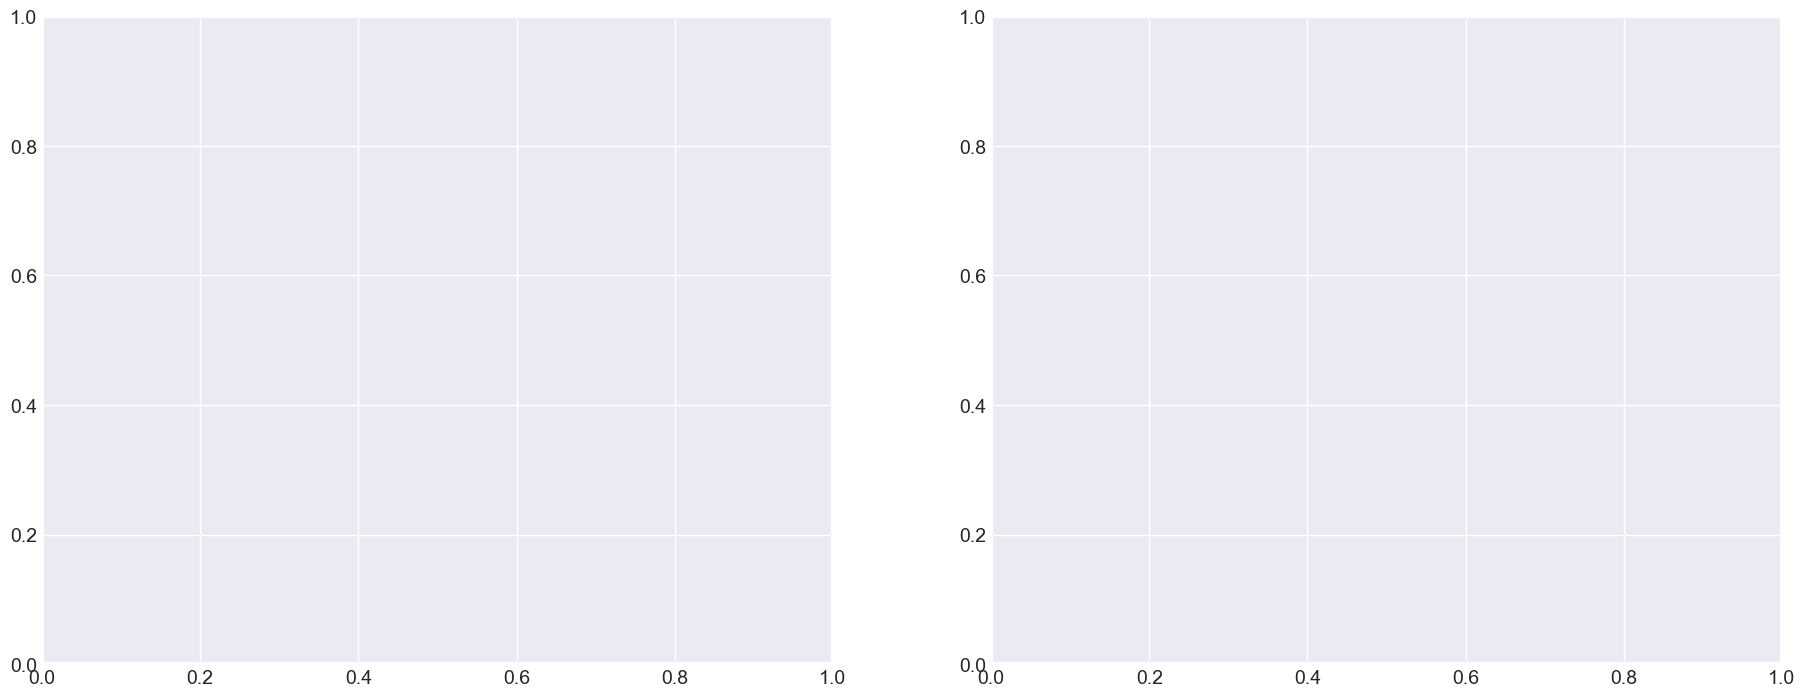

In [95]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

KeyError: 'test preparation course'

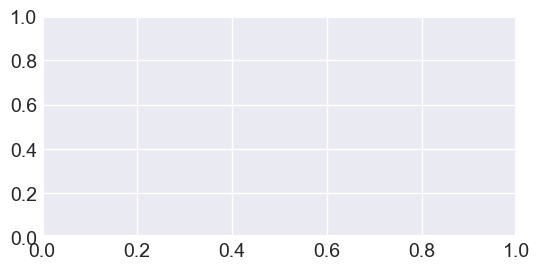

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

KeyError: 'average'

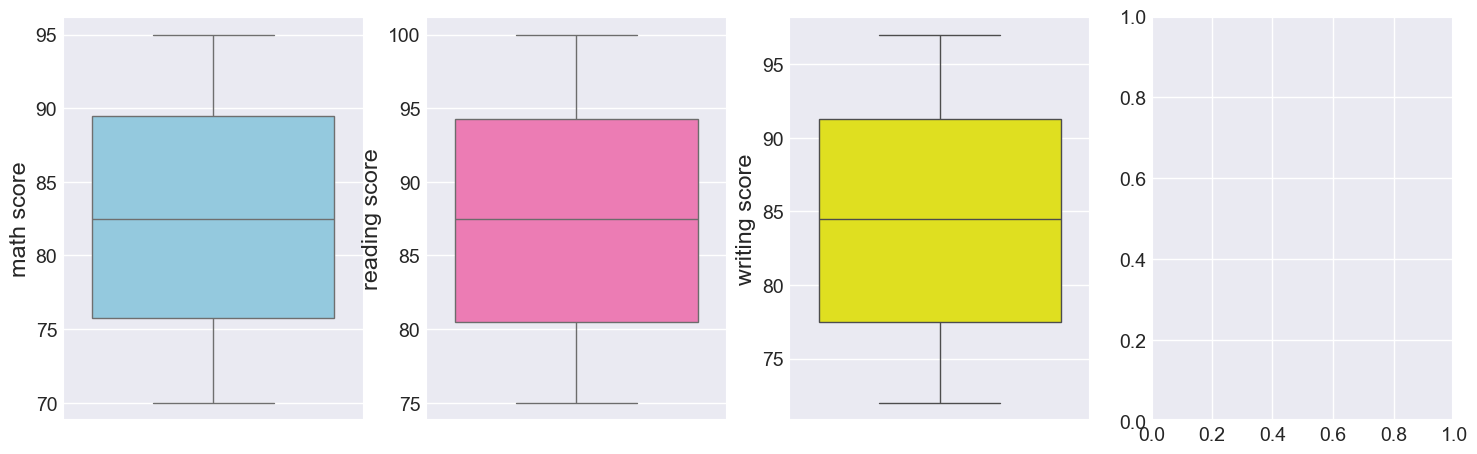

In [97]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

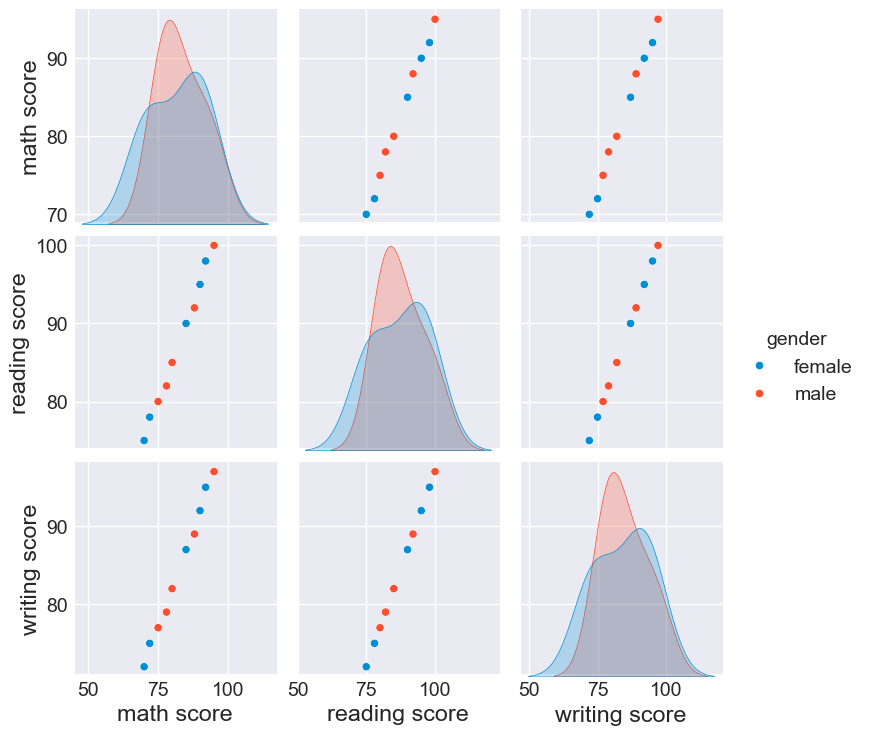

In [98]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.